<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Topic-modeling---Initial-Data-import-and-preprocessing" data-toc-modified-id="Topic-modeling---Initial-Data-import-and-preprocessing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Topic modeling - Initial Data import and preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Packages-Used" data-toc-modified-id="Packages-Used-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Packages Used</a></span></li></ul></li><li><span><a href="#Import-of-datasets" data-toc-modified-id="Import-of-datasets-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import of datasets</a></span></li><li><span><a href="#Examining-the-data-through-visualizations" data-toc-modified-id="Examining-the-data-through-visualizations-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Examining the data through visualizations</a></span></li><li><span><a href="#Statistical-summary-of-the-article-data" data-toc-modified-id="Statistical-summary-of-the-article-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Statistical summary of the article data</a></span></li></ul></li><li><span><a href="#Scraping-BBC-for-all-articles" data-toc-modified-id="Scraping-BBC-for-all-articles-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Scraping BBC for all articles</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Appending-scraped-data" data-toc-modified-id="Appending-scraped-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Appending scraped data</a></span></li><li><span><a href="#Data-cleaning-removing-punctuations,quotations,spaces" data-toc-modified-id="Data-cleaning-removing-punctuations,quotations,spaces-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Data cleaning-removing punctuations,quotations,spaces</a></span></li><li><span><a href="#Running-the-model" data-toc-modified-id="Running-the-model-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Running the model</a></span></li><li><span><a href="#GridSearch-the-best-LDA-model" data-toc-modified-id="GridSearch-the-best-LDA-model-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>GridSearch the best LDA model</a></span></li><li><span><a href="#Best-Model" data-toc-modified-id="Best-Model-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Best Model</a></span></li><li><span><a href="#Visualizing-the-model" data-toc-modified-id="Visualizing-the-model-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Visualizing the model</a></span></li><li><span><a href="#Investigating-percentage-of-topics-in-the-documents" data-toc-modified-id="Investigating-percentage-of-topics-in-the-documents-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Investigating percentage of topics in the documents</a></span></li><li><span><a href="#Finding-out-the-dominant-topic" data-toc-modified-id="Finding-out-the-dominant-topic-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Finding out the dominant topic</a></span></li><li><span><a href="#Distribution-of-topics-across-documents" data-toc-modified-id="Distribution-of-topics-across-documents-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>Distribution of topics across documents</a></span></li><li><span><a href="#Topic's-keywords" data-toc-modified-id="Topic's-keywords-3.10"><span class="toc-item-num">3.10&nbsp;&nbsp;</span>Topic's keywords</a></span></li></ul></li></ul></div>

# Topic modeling - Initial Data import and preprocessing

In this project, we attempt to perform topic modeling on four data sets, three of which are merged to form a single dataset and one consisting of scraped articles from BBC website. 
In this part, we attempt to import the datasets obtained from https://www.kaggle.com/ and perform some basic EDA and visualizations.

### Packages Used

In [1]:
#!pip install beautifulsoup4
#!pip install requests
#!pip install gensim
#pip install --upgrade setuptools
#!pip install pyLDAvis
#!pip install nltk.tokenize

import pandas as pd
import nltk; nltk.download('stopwords')
import gensim
import re
import numpy as np
from pprint import pprint
import string
nltk.download('wordnet')
import pyLDAvis
import pyLDAvis.sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer 
import string

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from sklearn.feature_extraction.text import CountVectorizer;
from tqdm import tqdm
import string
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import concurrent.futures
import time
#import pyLDAvis.sklearn
from pylab import bone, pcolor, colorbar, plot, show, rcParams, savefig
import seaborn as sns
import random
import scipy.stats as stats
from scipy.stats import chi2_contingency
import sklearn.metrics as metrics
import requests 
from bs4 import BeautifulSoup
from urllib.parse import urlparse, urljoin
import colorama
import re
import scipy
from collections import Counter
from time import time
%matplotlib inline

import warnings
warnings.filterwarnings("ignore");

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jeevisha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jeevisha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Import of datasets 

In [2]:
data1 = pd.read_csv("articles1.csv", encoding='latin1')

In [3]:
data1.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content,...,Unnamed: 845,Unnamed: 846,Unnamed: 847,Unnamed: 848,Unnamed: 849,Unnamed: 850,Unnamed: 851,Unnamed: 852,Unnamed: 853,Unnamed: 854
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,12/31/2016,2016,12,NaN,WASHINGTON â Congressional Republicans ha...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,6/19/2017,2017,6,NaN,"After the bullet shells get counted, the blood...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,17285,"Tyrus Wong, âBambiâ Artist Thwarted by Rac...",New York Times,Margalit Fox,1/6/2017,2017,1,NaN,When Walt Disneyâs âBambiâ opened in 194...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,4/10/2017,2017,4,NaN,"Death may be the great equalizer, but it isnâ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,1/2/2017,2017,1,NaN,"SEOUL, South Korea â North Koreaâs lead...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data2 = pd.read_csv("articles2.csv")

In [5]:
data2.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,53293,73471,Patriots Day Is Best When It Digs Past the Her...,Atlantic,David Sims,2017-01-11,2017.0,1.0,NaN,"Patriots Day, Peter Berg’s new thriller that r..."
1,53294,73472,A Break in the Search for the Origin of Comple...,Atlantic,Ed Yong,2017-01-11,2017.0,1.0,NaN,"In Norse mythology, humans and our world were ..."
2,53295,73474,Obama’s Ingenious Mention of Atticus Finch,Atlantic,Spencer Kornhaber,2017-01-11,2017.0,1.0,NaN,“If our democracy is to work in this increasin...
3,53296,73475,"Donald Trump Meets, and Assails, the Press",Atlantic,David A. Graham,2017-01-11,2017.0,1.0,NaN,Updated on January 11 at 5:05 p. m. In his fir...
4,53297,73476,Trump: ’I Think’ Hacking Was Russian,Atlantic,Kaveh Waddell,2017-01-11,2017.0,1.0,NaN,Updated at 12:25 p. m. After months of equivoc...


In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50120 entries, 0 to 50119
Columns: 855 entries, Unnamed: 0 to Unnamed: 854
dtypes: float64(5), object(850)
memory usage: 326.9+ MB


In [42]:
data1.shape

(50120, 855)

We can see that these datasets have the same columns and also in the same order. Hence we append all the three datasets together and work on it as a whole.

In [8]:
data3 = pd.read_csv("articles3.csv")

In [9]:
data = data1.append(data2)

In [10]:
data.append(data3)

,Unnamed: 0,id,title,publication,author,date,year,month,url,content,...,Unnamed: 845,Unnamed: 846,Unnamed: 847,Unnamed: 848,Unnamed: 849,Unnamed: 850,Unnamed: 851,Unnamed: 852,Unnamed: 853,Unnamed: 854
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,12/31/2016,2016,12,NaN,WASHINGTON â Congressional Republicans ha...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,6/19/2017,2017,6,NaN,"After the bullet shells get counted, the blood...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,17285,"Tyrus Wong, âBambiâ Artist Thwarted by Rac...",New York Times,Margalit Fox,1/6/2017,2017,1,NaN,When Walt Disneyâs âBambiâ opened in 194...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,4/10/2017,2017,4,NaN,"Death may be the great equalizer, but it isnâ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,1/2/2017,2017,1,NaN,"SEOUL, South Korea â North Koreaâs lead...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42566,146028,218078,An eavesdropping Uber driver saved his 16-year...,Washington Post,Avi Selk,2016-12-30,2016,12,https://web.archive.org/web/20161231004909/htt...,Uber driver Keith Avila picked up a p...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42567,146029,218079,Plane carrying six people returning from a Cav...,Washington Post,Sarah Larimer,2016-12-30,2016,12,https://web.archive.org/web/20161231004909/htt...,Crews on Friday continued to search L...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42568,146030,218080,After helping a fraction of homeowners expecte...,Washington Post,Renae Merle,2016-12-30,2016,12,https://web.archive.org/web/20161231004909/htt...,When the Obama administration announced a...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42569,146031,218081,"Yes, this is real: Michigan just banned bannin...",Washington Post,Chelsea Harvey,2016-12-30,2016,12,https://web.archive.org/web/20161231004909/htt...,This story has been updated. A new law in...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The combined dataset has 142690 rows and 855 columns. 

Now to find the Null values in the datasets.

In [44]:
data.isnull().sum()

Unnamed: 0           3
id                   3
title                6
publication          7
author           14911
                 ...  
Unnamed: 851    100118
Unnamed: 852    100118
Unnamed: 853    100118
Unnamed: 854    100118
id2                106
Length: 856, dtype: int64

Now we examine the size of the articles in the dataset. We take statistical summary of the article content.

In [12]:
lengths = pd.Series(data['content'].str.len())
print(lengths.describe())

count    100108.000000
mean       4053.986135
std        4389.325293
min           1.000000
25%        1723.000000
50%        3049.000000
75%        5102.000000
max      164658.000000
Name: content, dtype: float64


In [45]:
data.reset_index(drop=True, inplace=True)

We attempt to remove all abnormal values here by removing all the rows which have non numeric values for Id columns

In [46]:
for i in range(data.shape[0]):
    try:
        data.loc[i,'id2']= int(data.loc[i,'id'])
    except:
        data.loc[i,'id2']=np.nan

In [47]:
#removing rows with abnormal values in ID column
d2=data.loc[~data['id2'].isna()]
d2['id2'].describe()

count    100013.000000
mean      79463.737454
std       40545.921374
min        2016.000000
25%       43747.000000
50%       73462.000000
75%      119043.000000
max      151906.000000
Name: id2, dtype: float64

In [48]:
d2['id2'][d2['id2']]

id2
17283.0     35969.0
17284.0     35970.0
17285.0     35971.0
17286.0     35972.0
17287.0     35973.0
             ...   
151902.0        NaN
151903.0        NaN
151904.0        NaN
151905.0        NaN
151906.0        NaN
Name: id2, Length: 100013, dtype: float64

## Examining the data through visualizations

First, let us look at the article count of the publications listed in the dataset

In [49]:
d2 = d2.groupby("publication").filter(lambda x: len(x) > 1)

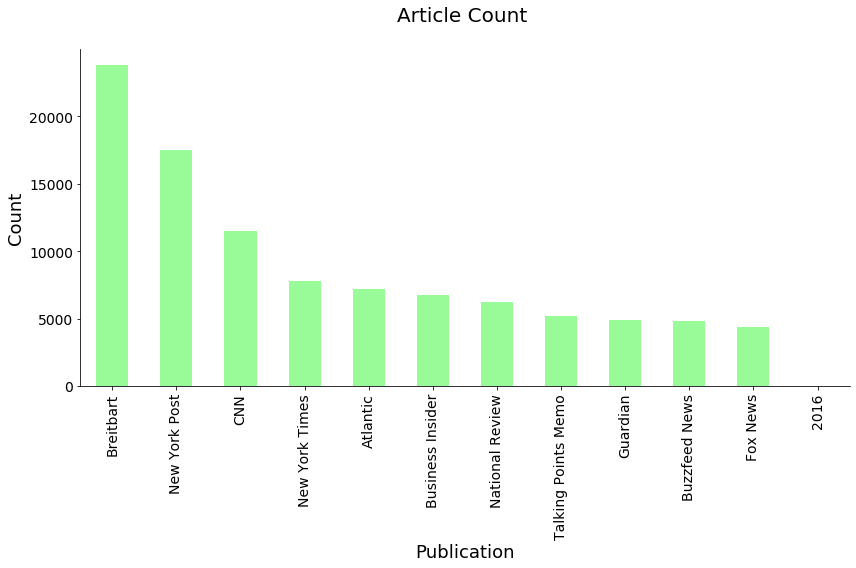

In [53]:
ax = d2['publication'].value_counts().plot(kind='bar', fontsize=14, figsize=(12,8), color="palegreen")
ax.set_title('Article Count \n', fontsize=20)
ax.set_xlabel('Publication', fontsize=18)
ax.set_ylabel('Count', fontsize=18)
plt.tight_layout()
sns.despine();

Looks like Breitbart has the most number of articles followed by New York Post

Let us now look at the trend of number of words in an article 

In [19]:
import string
def clean_text(d2):
    # removes punctuation and converts all the text to lower case
    clean1 = re.sub(r'['+string.punctuation + '’—”'+']', "", d2.lower())
    return re.sub(r'\W+', ' ', clean1)

d2['tokenized'] = d2['content'].map(lambda x: clean_text(x))
d2['num_words'] = d2['tokenized'].apply(lambda x: len(x.split()))

d2 = d2[d2['num_words']>0]

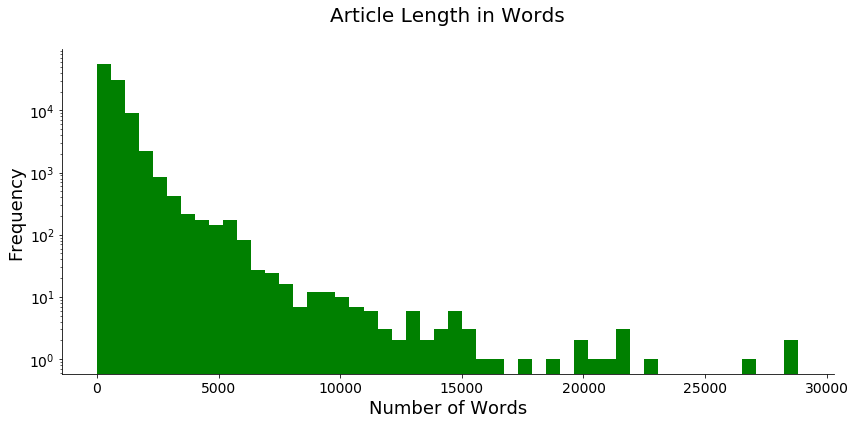

In [20]:
ax=d2['num_words'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,6), color="green")
ax.set_title('Article Length in Words\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Words', fontsize=18)
ax.set_yscale("log")
plt.tight_layout()
sns.despine();

Unique words per article

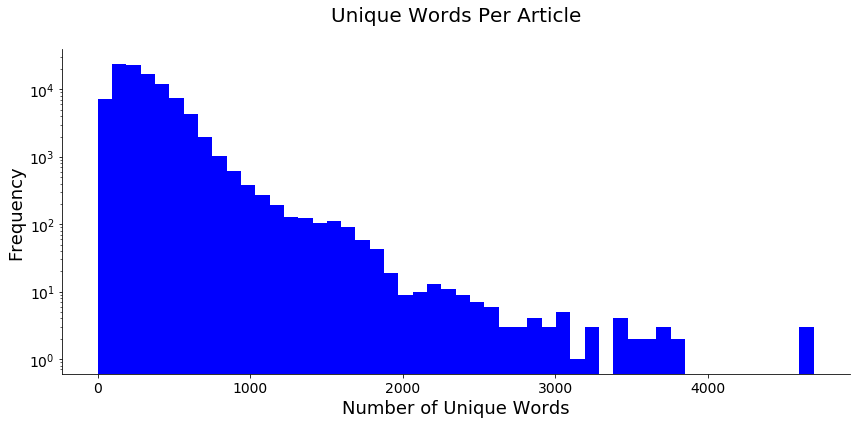

In [21]:
# number of unique words in each article
d2['unique_words'] = d2['tokenized'].str.split().apply(lambda x: len(set(x)))

ax=d2['unique_words'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,6), color="blue")
ax.set_title('Unique Words Per Article\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Unique Words', fontsize=18)
ax.set_yscale("log")
plt.tight_layout()
sns.despine();

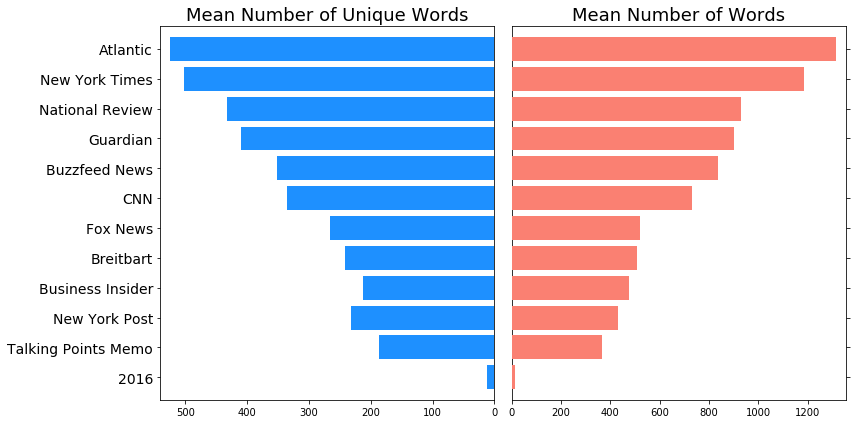

In [22]:
article_groups = d2.groupby('publication')

publications = article_groups['num_words'].aggregate(np.mean).index.tolist()
avg_words = article_groups['num_words'].aggregate(np.mean).values
unique_words = article_groups['unique_words'].aggregate(np.mean).values

# Sort by number of avg_words
idx = avg_words.argsort()
publications, avg_words, unique_words = [np.take(x, idx) for x in [publications, avg_words, unique_words]]

y = np.arange(unique_words.size)

fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(12,6))
axes[0].barh(y, unique_words, align='center', color='dodgerblue', zorder=10)
axes[0].set_title('Mean Number of Unique Words', fontsize=18)
axes[1].barh(y, avg_words, align='center', color='salmon', zorder=10)
axes[1].set_title('Mean Number of Words', fontsize=18)

axes[0].invert_xaxis()
axes[0].set_yticks(y)
axes[0].set_yticklabels(publications, fontsize=14)
axes[0].yaxis.tick_left()

axes[1].yaxis.tick_right()

for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(False)

fig.tight_layout()
fig.subplots_adjust(wspace=0)
plt.tight_layout();

Atlantic publication articles have more number of unique words in average than any other publications.
It closely followed, however by New York Times and then National Review.

In [23]:
#creating a corpus for all authors in the dataset
names = d2.author.value_counts()[data.author.value_counts()].index.tolist()

#dataframes with the authors and the articles for creating the corpus
author_articles = pd.DataFrame()

for name in names:
    articles = d2[data.author == name][['title', 'content', 'author']]
    author_articles = author_articles.append(articles)

author_articles = author_articles.reset_index().drop('index',1)
author_articles.head()

,title,content,author
0,"Vivian Howard, a TV Chef, Offers Hope for Her ...","KINSTON, N. C. â Just before Christmas, i...",Kim Severson
1,Tucson Becomes an Unlikely Food Star - The New...,"TUCSON â There are food deserts, those ur...",Kim Severson
2,When Is Peach Season? Itâs a Bit Fuzzy - The...,"Kathleen Purvis, the Southern food writer most...",Kim Severson
3,Why Christopher Kimball Is Moving On From Amer...,BOSTON â Christopher Kimball spent much o...,Kim Severson
4,11 Ideas for Midweek Cooking - The New York Times,"Kim Severson is filling in for Sam Sifton, who...",Kim Severson


In [24]:
len(author_articles.index)

9072507

In [25]:
len(np.unique(author_articles.index))

9072507

In [26]:
len(np.unique(author_articles.author))

224

In [27]:
print(author_articles.author.value_counts())

Pam Key             6463844
Associated Press    1148961
Charlie Spiering     385120
Jerome Hudson        213590
John Hayward         153882
                     ...   
Elle Hunt                17
Brooke Singman           13
Sarah Jorgensen           9
Rachael Krishna           8
Kim Severson              6
Name: author, Length: 224, dtype: int64


## Statistical summary of the article data

In [28]:
print("Statistical summary of article data")
art_length = pd.Series([len(x) for x in author_articles.content])
print(art_length.describe())

Statistical summary of article data
count    9.072507e+06
mean     1.779148e+03
std      1.746469e+03
min      6.000000e+00
25%      8.570000e+02
50%      1.327000e+03
75%      2.046000e+03
max      1.646580e+05
dtype: float64


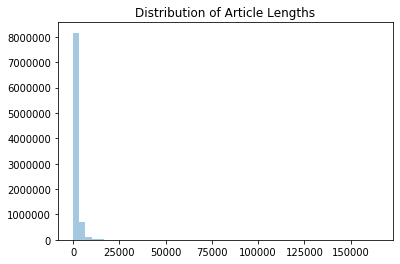

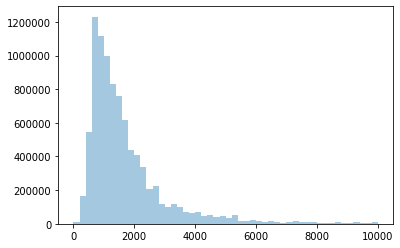

In [29]:
sns.distplot(art_length,kde=False)
plt.title('Distribution of Article Lengths')
plt.show()

sns.distplot(art_length[art_length<10000],kde=False)
plt.show()

# Scraping BBC for all articles 

In [2]:
html = requests.get("https://www.bbc.com/").text # fstrings require Python 3.6+
soup = BeautifulSoup(html, "html.parser")
All_links = [element.get('href') for element in soup.findAll('a')]

In [3]:
All_links[0:5]

['https://www.bbc.co.uk',
 '#orb-modules',
 'https://www.bbc.co.uk/accessibility/',
 'https://account.bbc.com/account',
 '#']

In [4]:
df = pd.DataFrame(All_links,columns=['links'])

In [5]:
df.shape

(299, 1)

In [6]:
df_internal_links = df[df['links'].str.contains('bbc')]

In [7]:
df_internal_links.shape

(120, 1)

In [8]:
df_internal_links.head()

,links
0,https://www.bbc.co.uk
2,https://www.bbc.co.uk/accessibility/
3,https://account.bbc.com/account
5,https://www.bbc.co.uk
6,https://www.bbc.co.uk/news


In [9]:
range(0,len(df_internal_links))

range(0, 120)

In [10]:
content=[]

for i in range(0,len(df_internal_links)):
    url = df_internal_links.iloc[i,0]
    try:
        r = requests.get(url) 
        #print('Web site exists')
        #print(r.content) 
        page = r.text
        soup = BeautifulSoup(page)
        # Get headline
        #headline = soup.find('h1').get_text()
        # Get text from all <p> tags.
        p_tags = soup.find_all('p')
        # Get the text from each of the “p” tags and strip surrounding whitespace.
        p_tags_text = [tag.get_text().strip() for tag in p_tags]
        # Filter out sentences that contain newline characters '\n' or don't contain periods.
        sentence_list = [sentence for sentence in p_tags_text if not '\n' in sentence]
        sentence_list = [sentence for sentence in sentence_list if '.' in sentence]
        # Combine list items into string.
        article = ' '.join(sentence_list)
        content.append(article)
    except requests.exceptions.RequestException as e:  
        print("error")
        continue     

error


In [11]:
len(content)

119

In [12]:
type(content)

list

In [13]:
content[1]

'This site provides accessibility help, enabling computer users to make the most of the internet whatever their ability or disability. BBC © 2014 The BBC is not responsible for the content of external sites. Read more. This page is best viewed in an up-to-date web browser with style sheets (CSS) enabled. While you will be able to view the content of this page in your current browser, you will not be able to get the full visual experience. Please consider upgrading your browser software or enabling style sheets (CSS) if you are able to do so.'

In [14]:
content

['Highlights of One World: Together at Home, a concert tribute to healthcare workers. Five teams set off from Mexico City in a race to reach Ushuaia in Argentina. Computer whiz Sergei fails to return from new job, alarming girlfriend Lily. Georgie makes a professional decision with unexpected emotional consequences. Eavesdrop on John and Kayleigh as they make another average day’s journey to work. Two sides of Glasgow collide when a teenage girl makes a pact with a wealthy couple.',
 'This site provides accessibility help, enabling computer users to make the most of the internet whatever their ability or disability. BBC © 2014 The BBC is not responsible for the content of external sites. Read more. This page is best viewed in an up-to-date web browser with style sheets (CSS) enabled. While you will be able to view the content of this page in your current browser, you will not be able to get the full visual experience. Please consider upgrading your browser software or enabling style sh

In [15]:
bbc_data = pd.DataFrame(content,columns=['content'])

# Modeling

## Appending scraped data

In [16]:
data1=pd.read_csv(r"articles1.csv")

In [17]:
data1.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [18]:
stop_words = stopwords.words('english')

In [19]:
type(stop_words)

list

In [55]:
df=pd.DataFrame()

In [56]:
df.shape

(0, 0)

In [57]:
df = data1.append(bbc_data)

In [58]:
df.shape

(50119, 10)

In [59]:
df = df.iloc[0:5000,:]

In [60]:
df=df[['content']]

In [61]:
df.head()

,content
0,WASHINGTON — Congressional Republicans have...
1,"After the bullet shells get counted, the blood..."
2,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,"Death may be the great equalizer, but it isn’t..."
4,"SEOUL, South Korea — North Korea’s leader, ..."


Using only a sample of data as it was using too much computational power for hyper parameter tuning

## Data cleaning-removing punctuations,quotations,spaces

In [62]:
Cleaned_Data = []
for i in range(0, len(df)):
    article = re.sub('[^a-zA-Z0-9]{3,}', ' ', str(df['content'][i]))
    article = re.sub('\[.*?\]', '', article)
    article = re.sub('[%s]' % re.escape(string.punctuation), '', article)
    article = re.sub('\w*\d\w*', '', article)
    article = re.sub('[‘’“”…]', '', article)
    article = re.sub('\n', '', article)
    article = article.lower()
    article = article.split()        
    lmtzr = WordNetLemmatizer()
    article =  [lmtzr.lemmatize(word) for word in article if word not in (stop_words)]
    article = ' '.join(article)
    Cleaned_Data.append(article)

In [63]:
final_words = []

In [64]:
for j in range(0,len(Cleaned_Data)):
    query = Cleaned_Data[j]
    querywords = query.split()
    query_yes = [word for word in querywords if len(word)> 4]
    final_words.append(' '.join(query_yes))

In [65]:
#final_words

In [66]:
len(final_words)

5000

In [67]:
#final_words

## Running the model

Vectorized the data and transformed to input in the final LDA model.

In [68]:
#words=['said','mr','says','cnn','fox']
cv = CountVectorizer(stop_words='english',min_df=3,max_df=0.9)

In [69]:
data_cv = cv.fit_transform(final_words)

In [70]:
lda = LatentDirichletAllocation(n_components=10, learning_method='online',verbose=True)
data_lda = lda.fit_transform(data_cv)

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


In [71]:
def selected_topics(model, cv, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(cv.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]]) 

**Topics as output with their probability scores**

In [72]:
print("LDA Model:")
selected_topics(lda, cv)

LDA Model:
Topic 0:
[('trump', 19717.404433660664), ('president', 6229.364072094821), ('clinton', 4606.188956183979), ('campaign', 3898.391528045026), ('republican', 3749.093105347594), ('state', 3648.596593467402), ('house', 2950.1998580320255), ('obama', 2835.250011746745), ('white', 2765.240884627399), ('court', 2558.147382324276)]
Topic 1:
[('percent', 3211.9306665268923), ('company', 3056.7188451077645), ('state', 2127.3217297723545), ('million', 2075.6412702023963), ('republican', 1965.2675082286717), ('health', 1817.0227874161833), ('people', 1766.7650415469493), ('money', 1392.335148633649), ('federal', 1375.0313136053157), ('business', 1345.288829396626)]
Topic 2:
[('restaurant', 590.3857760196538), ('museum', 576.783701799816), ('store', 575.9473836889332), ('brand', 476.5985162290911), ('fashion', 438.15319336069047), ('hotel', 434.42428441606023), ('little', 431.0799350300501), ('dress', 413.67882082205364), ('artist', 412.925661792861), ('episode', 406.32521061447784)]
Top

## GridSearch the best LDA model

In [271]:
# Define Search Param
search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(data_cv)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_components': [10, 15, 20, 25, 30], 'learning_decay': [0.5, 0.7, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [273]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_cv))

Best Model's Params:  {'learning_decay': 0.7, 'n_components': 10}
Best Log Likelihood Score:  -45973.23766052427
Model Perplexity:  1240.702868803249


## Best Model


In [73]:
lda = LatentDirichletAllocation(n_components=10, learning_method='online',learning_decay = 0.7 ,verbose=True)
data_lda = lda.fit_transform(data_cv)

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


In [74]:
def selected_topics(model, cv, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(cv.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]]) 
        
print("LDA Model:")
selected_topics(lda, cv)

LDA Model:
Topic 0:
[('movie', 794.8012219512135), ('music', 729.1493388022335), ('audience', 564.597654835275), ('television', 527.3594159230508), ('night', 490.122792091305), ('award', 487.98757316823026), ('album', 479.7469713653207), ('performance', 437.5499994788442), ('network', 437.04634872203775), ('theater', 432.3177784366629)]
Topic 1:
[('people', 3353.415611131354), ('woman', 2992.026264865967), ('thing', 1979.3797100940365), ('family', 1859.2829272246952), ('friend', 1781.2149021986104), ('world', 1771.679811368279), ('school', 1718.9193284742248), ('black', 1716.1306596046231), ('think', 1581.4238134311797), ('going', 1581.2777699349651)]
Topic 2:
[('trump', 19303.20376025224), ('president', 6435.845201832472), ('republican', 5700.195093656195), ('state', 4953.012954344632), ('clinton', 4082.1199417202597), ('campaign', 3735.9326905581465), ('house', 3501.7288968341372), ('party', 3246.092966284169), ('white', 2868.070616478956), ('obama', 2793.054799579572)]
Topic 3:
[('c

## Visualizing the model

In [75]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda, data_cv, cv, mds='tsne')
panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2       25.169891  248.117920       1        1  23.413276
1      209.216660 -191.849823       2        1  22.930905
7       27.901375   65.269516       3        1  15.319364
8       30.264032  -97.946259       4        1  13.785052
9     -154.312393  -18.991577       5        1   9.388014
6      212.552414  -13.683261       6        1   5.381931
4     -146.028275 -196.956192       7        1   4.751098
0      204.059906  164.312180       8        1   3.454240
5       32.826477 -280.796936       9        1   1.147846
3     -151.184052  159.138306      10        1   0.428275, topic_info=      Category          Freq        Term         Total  loglift  logprob
26158  Default  21488.000000       trump  21488.000000  30.0000  30.0000
4931   Default   6359.000000     company   6359.000000  29.0000  29.0000
24076  Default  13945.000000       state  13945.000000  28.0000  28.0000
4258   Default   3065.000000       china   3065.000000  27.0000  27.0000
26719  Default   6743.000000      united   6743.000000  26.0000  26.0000
21054  Default   5913.000000  republican   5913.000000  25.0000  25.0000
19349  Default   9112.000000   president   9112.000000  24.0000  24.0000
5734   Default   5881.000000     country   5881.000000  23.0000  23.0000
18962  Default   3533.000000      police   3533.000000  22.0000  22.0000
3514   Default   1425.000000  california   1425.000000  21.0000  21.0000
4580   Default   4801.000000     clinton   4801.000000  20.0000  20.0000
847    Default   6867.000000    american   6867.000000  19.0000  19.0000
10895  Default   5664.000000  government   5664.000000  18.0000  18.0000
27652  Default   1479.000000       water   1479.000000  17.0000  17.0000
3555   Default   4603.000000    campaign   4603.000000  16.0000  16.0000
17400  Default   2979.000000     officer   2979.000000  15.0000  15.0000
4261   Default   1449.000000     chinese   1449.000000  14.0000  14.0000
17151  Default   2214.000000       north   2214.000000  13.0000  13.0000
28135  Default   4252.000000       world   4252.000000  12.0000  12.0000
11609  Default   2546.000000      health   2546.000000  11.0000  11.0000
17401  Default   5592.000000    official   5592.000000  10.0000  10.0000
23623  Default   2033.000000       south   2033.000000   9.0000   9.0000
25721  Default   1512.000000       today   1512.000000   8.0000   8.0000
15996  Default   2415.000000    military   2415.000000   7.0000   7.0000
18409  Default   4138.000000     percent   4138.000000   6.0000   6.0000
18394  Default  12097.000000      people  12097.000000   5.0000   5.0000
7131   Default   2114.000000    director   2114.000000   4.0000   4.0000
21834  Default   2261.000000      russia   2261.000000   3.0000   3.0000
21835  Default   1920.000000     russian   1920.000000   2.0000   2.0000
28080  Default   5080.000000       woman   5080.000000   1.0000   1.0000
...        ...           ...         ...           ...      ...      ...
28013  Topic10     18.665390     wintour     19.546539   5.4070  -6.1723
4676   Topic10     18.336837     cochran     19.218598   5.4062  -6.1901
4051   Topic10     19.055774      chanel     19.993740   5.4051  -6.1516
9609   Topic10     17.557219     fillons     18.441764   5.4040  -6.2335
4327   Topic10    327.087409    christie    346.384327   5.3958  -3.3088
7902   Topic10     44.177626      durant     46.668158   5.3983  -5.3108
27457  Topic10     51.483243       vogue     54.840252   5.3900  -5.1578
28103  Topic10     44.831295    woodward     47.796077   5.3891  -5.2961
27932  Topic10    115.592597      wilder    133.457632   5.3094  -4.3489
2338   Topic10     38.566811      berman     43.001837   5.3443  -5.4466
9355   Topic10    278.411950     fashion    416.698941   5.0499  -3.4699
14030  Topic10     46.262071       klein     59.877901   5.1952  -5.2647
7779   Topic10    205.091252       dress    426.5

## Investigating percentage of topics in the documents

In [76]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda.score(data_cv))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda.perplexity(data_cv))

# See model parameters
pprint(lda.get_params())

Log Likelihood:  -17481119.962074593
Perplexity:  4308.738613183207
{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 10,
 'n_jobs': None,
 'n_topics': None,
 'perp_tol': 0.1,
 'random_state': None,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': True}


In [77]:
lda.n_components

10

In [78]:
data = data1.content.tolist()

In [79]:
data=data[0:5000]

## Finding out the dominant topic

In [80]:
# Create Document - Topic Matrix
lda_output = lda.transform(data_cv)

# column names
topicnames = ["Topic" + str(i) for i in range(lda.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(data))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
Doc0,0,0,0.73,0,0,0,0,0.27,0,0,2
Doc1,0,0.21,0,0,0,0,0.01,0.15,0.62,0,8
Doc2,0.06,0.75,0.05,0,0.05,0.02,0,0,0.05,0,1
Doc3,0.19,0.54,0.06,0.01,0.01,0,0.02,0.01,0.11,0.05,1
Doc4,0,0,0.09,0,0.74,0,0,0.1,0.07,0,4
Doc5,0.09,0.12,0,0.34,0,0,0.11,0,0.34,0,3
Doc6,0,0,0.17,0,0.79,0,0.04,0,0,0,4
Doc7,0.01,0.27,0,0.02,0,0.01,0.59,0.1,0,0.01,6
Doc8,0.26,0.63,0.05,0,0,0.03,0,0.02,0,0.01,1
Doc9,0,0.61,0,0,0,0,0.31,0.08,0,0,1


In [81]:
round(df_document_topic.describe(),3)

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
count,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000
mean,0.042,0.229,0.221,0.005,0.045,0.013,0.058,0.148,0.141,0.096,4.182
std,0.107,0.240,0.270,0.024,0.107,0.048,0.131,0.216,0.222,0.163,3.116
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.020,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
50%,0.000,0.140,0.100,0.000,0.000,0.000,0.000,0.050,0.020,0.020,2.000
75%,0.020,0.380,0.360,0.000,0.030,0.000,0.050,0.190,0.200,0.120,7.000
max,0.990,0.980,1.000,0.360,0.920,0.680,0.930,0.990,1.000,0.990,9.000


## Distribution of topics across documents

In [82]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,1,1301
1,2,1234
2,8,788
3,7,716
4,9,399
5,6,239
6,4,169
7,0,128
8,5,23
9,3,3


## Topic's keywords

In [83]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(lda.components_)

In [84]:
# Assign Column and Index
df_topic_keywords.columns = cv.get_feature_names()

In [86]:
topicnames = ["Topic" + str(i) for i in range(lda.n_components)]
df_topic_keywords.index = topicnames

In [87]:
# View
round(df_topic_keywords,3)

,aaron,abaaoud,ababa,aback,abadi,abadis,abandon,abandoned,abandoning,abandonment,...,zubaydah,zucchini,zucker,zuckerberg,zuckerbergs,zurich,álvaro,ángel,élysée,équipe
Topic0,14.734,0.10,0.100,0.100,0.100,0.100,0.100,0.100,0.100,0.100,...,0.100,0.100,0.100,0.100,0.100,0.100,0.100,0.100,0.100,0.100
Topic1,7.354,0.10,0.100,0.100,0.100,0.100,17.671,77.222,8.823,6.535,...,0.100,2.868,12.864,0.100,0.100,4.698,0.100,2.107,0.100,0.100
Topic2,0.113,0.10,0.100,7.901,22.892,0.100,39.914,27.807,20.423,5.488,...,0.137,0.100,0.100,0.100,0.100,0.100,0.100,0.100,0.100,0.100
Topic3,0.100,0.10,0.100,0.100,0.100,0.100,0.100,0.100,0.100,0.100,...,0.100,0.100,0.100,0.100,0.100,0.100,0.100,0.100,0.100,0.100
Topic4,0.100,0.10,0.100,0.100,0.100,0.100,53.766,0.110,11.106,3.844,...,0.100,0.100,0.100,0.101,0.100,0.100,0.100,0.100,0.100,0.100
Topic5,0.100,0.10,0.100,0.100,0.100,0.100,0.100,0.262,0.100,0.100,...,0.100,2.570,0.100,0.100,0.100,0.100,0.100,0.100,0.100,0.100
Topic6,13.931,0.10,16.123,4.523,0.100,0.100,0.100,0.844,0.100,0.100,...,0.100,0.100,0.100,0.100,0.100,0.100,0.100,0.100,0.100,0.100
Topic7,0.100,0.10,0.100,0.102,0.100,0.100,2.557,17.537,6.089,0.100,...,0.100,0.100,0.100,73.372,4.868,4.707,0.100,0.100,0.100,0.100
Topic8,0.100,17.27,2.458,0.266,0.100,9.598,18.701,66.300,4.730,0.229,...,2.123,0.100,0.100,0.100,0.100,0.100,4.562,2.287,4.642,9.676
Topic9,61.979,0.10,0.100,2.049,0.100,0.100,5.964,0.102,0.100,0.100,...,10.994,0.100,6.379,0.100,0.100,0.100,0.100,0.100,0.100,0.100
